In [1]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np

In [3]:
(x_train,y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16267866455985826839
xla_global_id: -1
]


In [7]:
print(x_train.shape)

(60000, 28, 28)


In [9]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

def imshow(title, image = None, size = 6):
    if image.any():
        w,h = image.shape[0], image.shape[1]
        aspect_ratio = w/h
        plt.figure(figsize = (size * aspect_ratio,size))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
    else:
        print("Image not found")
    

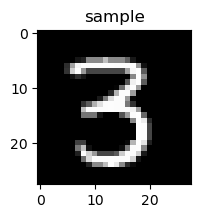

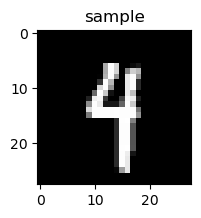

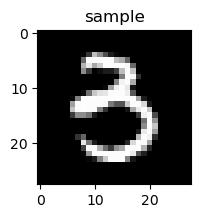

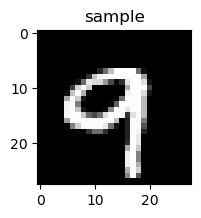

In [11]:
for i in range(0,4):
    random = np.random.randint(0,len(x_train))
    imshow("sample", x_train[random], size =2)

In [7]:
def display_examples(xtrain, ytrain):
    plt.figure(figsize = (10,10))
    
    for i in range(25):
        idx = np.random.randint(0,len(xtrain))
        img = xtrain[idx]
        labels = ytrain[idx]
        plt.subplot(5,5,i+1)
        plt.title(str(labels))
#         plt.tight_layout()
        plt.imshow(img, cmap ="gray_r")

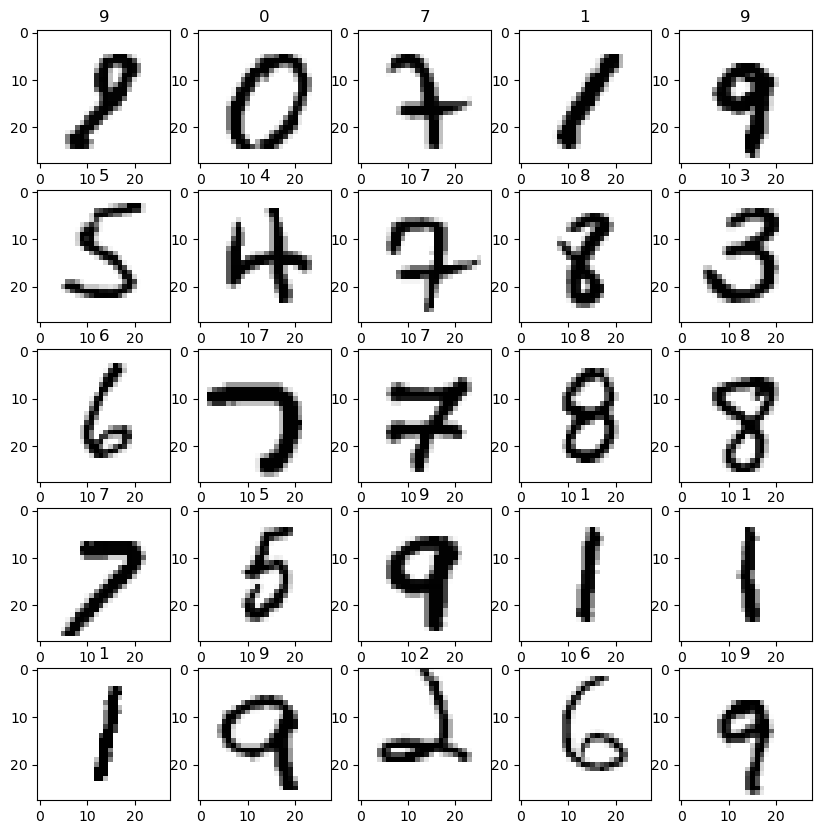

In [8]:
display_examples(x_train,y_train)

In [13]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [9]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

In [10]:
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# """or """
# x_train = np.expand_dims(x_train, 1)

In [11]:
x_train.shape


(60000, 28, 28, 1)

In [12]:
x_test.shape 

(10000, 28, 28, 1)

In [13]:
imput_shape = (img_rows, img_cols, 1)

In [14]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [15]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [16]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
y_test.shape

(10000, 10)

# Building our Model 

In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K 
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32 ,kernel_size =(3,3), activation = "relu", input_shape = imput_shape ))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128,activation = "relu"))
model.add(Dense(10, activation = "softmax"))
model.compile(loss = "categorical_crossentropy",
             optimizer = SGD(0.001),
             metrics = ["accuracy"])

print(model.summary())

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
batch_size =128 
epochs = 25 

history = model.fit(x_train,
           y_train,
           batch_size= batch_size,
           epochs = epochs,
           verbose =1,
           validation_data = (x_test,y_test)
          )
score = model.evaluate(x_test,y_test, verbose =0)
print(f"Test loss: score[0]")
print(f"Test accuracy:score[1]")

Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 71s 147ms/step - accuracy: 0.1988 - loss: 2.2685 - val_accuracy: 0.5546 - val_loss: 2.0970
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 152ms/step - accuracy: 0.6164 - loss: 1.9413 - val_accuracy: 0.7806 - val_loss: 1.1362
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 124ms/step - accuracy: 0.7989 - loss: 0.9249 - val_accuracy: 0.8668 - val_loss: 0.5310
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 76s 112ms/step - accuracy: 0.8628 - loss: 0.5110 - val_accuracy: 0.8916 - val_loss: 0.4011
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 173ms/step - accuracy: 0.8864 - loss: 0.4069 - val_accuracy: 0.9043 - val_loss: 0.3497
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.8975 - loss: 0.3578 - val_accuracy: 0.9107 - val_loss: 0.3204
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 124s 136ms/step - accuracy: 0.9065 - loss: 0.3318 - val_accuracy: 0.9157 - val_loss: 0.2987
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 186ms/step - accuracy: 0.9110 - loss: 

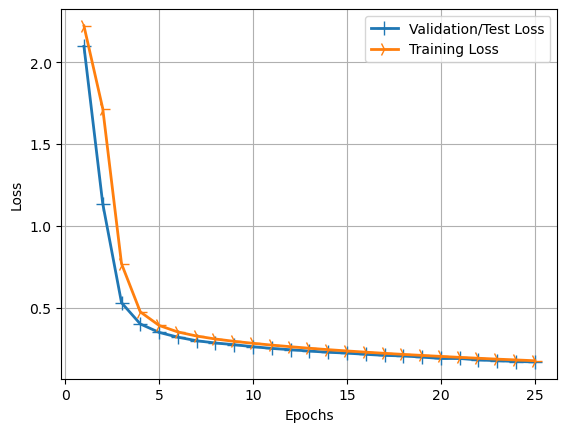

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history 
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+ 1 )
line1 = plt.plot(epochs, val_loss_values,label ="Validation/Test Loss")
line2 = plt.plot(epochs, loss_values, label = "Training Loss")
plt.setp(line1, linewidth =2.0,marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.00)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

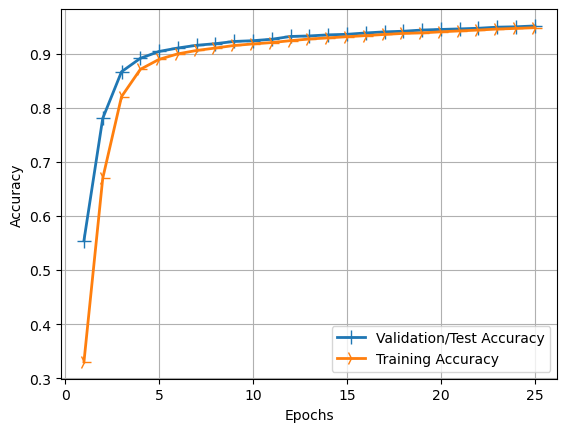

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history 

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values)+ 1 )
line1 = plt.plot(epochs, val_acc_values,label ="Validation/Test Accuracy")
line2 = plt.plot(epochs, acc_values, label = "Training Accuracy")
plt.setp(line1, linewidth =2.0,marker = "+", markersize = 10.0)
plt.setp(line2, linewidth = 2.0, marker = "4", markersize = 10.00)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [23]:
model.save(r"C:\Users\ADMIN\Desktop\DEEP LEARNING\tensorflow_mnist.h5")

In [3]:
from tensorflow.keras.models import load_model

In [13]:
(x_train,y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [25]:
x_test = x_test.reshape(10000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28, 1)

In [34]:
pred = np.argmax(model.predict(x_test), axis =1)
print("completed")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
completed


In [66]:
result = np.absolute(y_test -pred)
misclassified_indices = np.nonzero(result)

In [68]:
print(misclassified_indices)

(array([   8,   62,   92,  124,  195,  241,  247,  259,  290,  300,  313,
        318,  320,  321,  340,  352,  362,  412,  444,  445,  448,  449,
        478,  495,  502,  507,  515,  531,  543,  551,  565,  578,  591,
        610,  613,  628,  659,  684,  689,  691,  707,  717,  720,  740,
        791,  795,  810,  839,  844,  890,  898,  938,  939,  947,  950,
        965,  990, 1003, 1012, 1014, 1032, 1039, 1044, 1062, 1096, 1101,
       1107, 1112, 1114, 1173, 1181, 1182, 1192, 1194, 1198, 1204, 1206,
       1226, 1232, 1234, 1242, 1247, 1256, 1260, 1270, 1283, 1289, 1299,
       1310, 1319, 1326, 1328, 1337, 1378, 1393, 1433, 1444, 1453, 1494,
       1500, 1522, 1527, 1530, 1549, 1553, 1581, 1609, 1621, 1634, 1671,
       1678, 1681, 1709, 1717, 1754, 1774, 1790, 1828, 1850, 1857, 1865,
       1878, 1901, 1911, 1938, 1940, 1941, 1952, 1970, 1981, 1984, 2016,
       2024, 2033, 2035, 2040, 2043, 2044, 2053, 2070, 2098, 2109, 2118,
       2125, 2129, 2130, 2135, 2168, 2182, 2185, 2

In [70]:
print(f"Number of misclassified {len(misclassified_indices[0])} ")

Number of misclassified 497 


In [84]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

def imshow(title ="", size =6, image = None):
    if image.any():
        w,h = image.shape[0], image.shape[1]
        aspect_ratio = w/h
        plt.figure(figsize = (size * aspect_ratio, size ))
        plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.show()
    else:
        print("No image found")


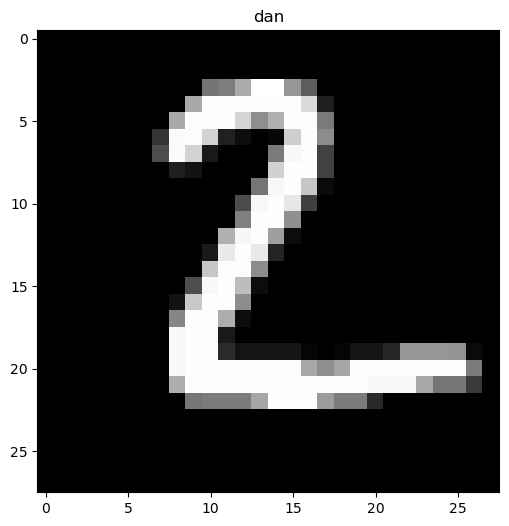

In [100]:
imshow(title= "dan", size = 6, image= x_test[1])

In [173]:
new_m = []
for i in range(1,10):
    idx = np.random.randint(0, len(misclassified_indices[0]))
    new_m.append(misclassified_indices[0][idx])

In [175]:
new_m

[1494, 3132, 9019, 4615, 8406, 318, 1289, 9755, 4500]

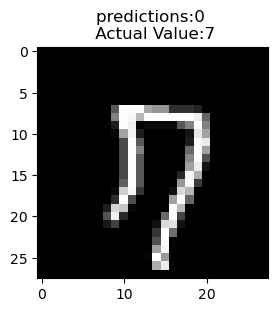

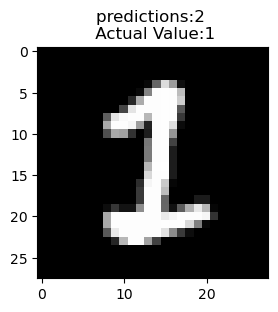

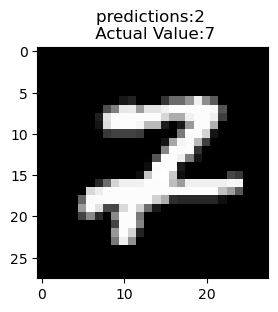

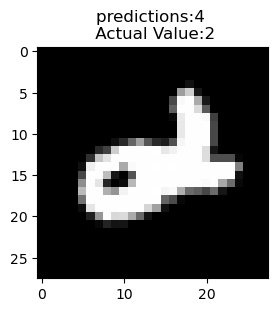

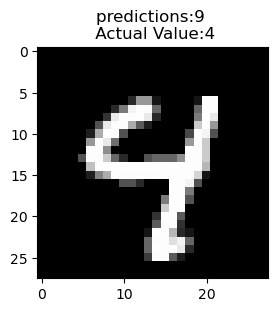

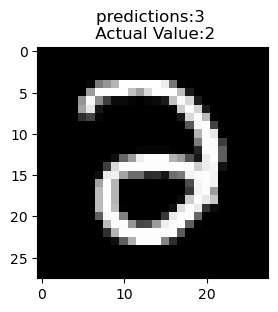

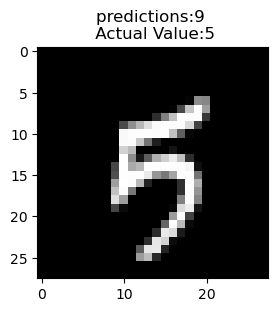

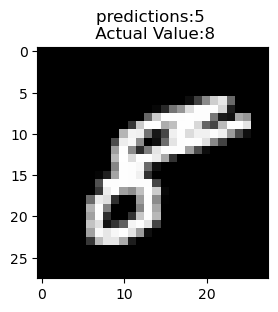

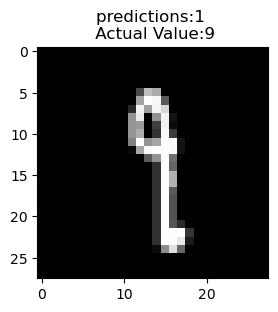

In [189]:
for i in new_m:
    image = x_test[i]
    predictions= pred[i]
    imshow(title = f"predictions:{predictions} \n Actual Value:{y_test[i]}" , size =3, image =image)
    

In [214]:
from sklearn.metrics import confusion_matrix 
x_test = x_test.reshape(10000,28,28,1)
y_pred = np.argmax(model.predict(x_test), axis = 1)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[[ 967    0    1    1    1    3    4    1    2    0]
 [   0 1120    3    2    0    1    3    1    5    0]
 [   9    1  962   20    6    1    7    6   17    3]
 [   1    2    5  959    1    8    1    9   15    9]
 [   1    0    6    0  938    0    9    2    2   24]
 [   8    4    1   25    2  816   10    3   14    9]
 [  10    3    2    3    6    8  922    1    3    0]
 [   2    7   17    8    6    0    0  957    4   27]
 [   6    3    3   16    7    9    7    3  915    5]
 [   8    7    1   13   20    1    1    5    6  947]]


In [218]:
class_accuracy = 100 * conf_mat.diagonal()/ conf_mat.sum(1)
for (i,ca) in enumerate(class_accuracy):
    print(f"Accuracy for {i}:{ca :3f}%")

Accuracy for 0:98.673469%
Accuracy for 1:98.678414%
Accuracy for 2:93.217054%
Accuracy for 3:94.950495%
Accuracy for 4:95.519348%
Accuracy for 5:91.479821%
Accuracy for 6:96.242171%
Accuracy for 7:93.093385%
Accuracy for 8:93.942505%
Accuracy for 9:93.855302%


In [228]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.93      0.95      1032
           3       0.92      0.95      0.93      1010
           4       0.95      0.96      0.95       982
           5       0.96      0.91      0.94       892
           6       0.96      0.96      0.96       958
           7       0.97      0.93      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.92      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

